## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

study_mouse_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
study_mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

mean = study_mouse_complete.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
meadians = study_mouse_complete.groupby("Drug Regimen").median()["Tumor Volume (mm3)"] 
variances = study_mouse_complete.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
sds = study_mouse_complete.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sems = study_mouse_complete.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary_df = pd.DataFrame({"Mean": mean, "Median": meadians, "Variance": variances, "SDS": sds, "SEMS": sems })

summary_df

,Mean,Median,Variance,SDS,SEMS
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

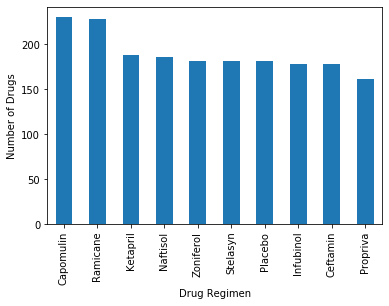

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

total_treatment = study_mouse_complete["Drug Regimen"].value_counts()
total_treatment.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drugs")
plt.show()




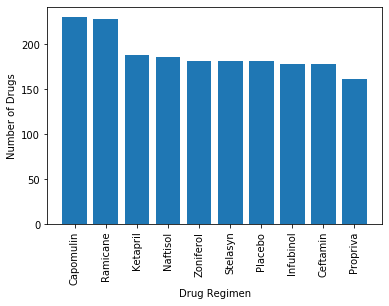

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
total_treatment = study_mouse_complete["Drug Regimen"].value_counts()
plt.bar(total_treatment.index.values, total_treatment.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Drugs")
plt.xticks(rotation=90)
plt.show()

## Pie plots

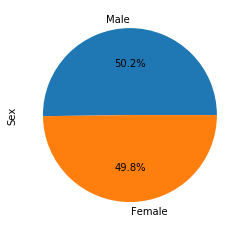

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
total_treatment = mouse_metadata.Sex.value_counts()
total_treatment.plot(kind="pie", autopct='%1.1f%%')
plt.show()

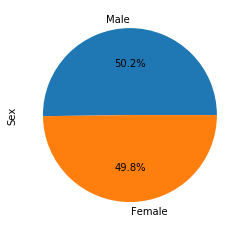

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
total_treatment = mouse_metadata.Sex.value_counts()
plt.pie(total_treatment.values, labels=total_treatment.index.values, autopct='%1.1f%%' )
plt.ylabel("Sex")
plt.show()

## Quartiles, outliers and boxplots

In [7]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.

max_tumor = study_mouse_complete.groupby(["Mouse ID"]).max()

max_tumor = max_tumor.reset_index()

max_tumor_merged = max_tumor[["Mouse ID", "Timepoint"]].merge(study_mouse_complete, on=["Mouse ID", "Timepoint"], how="left")

capomulin = max_tumor_merged.loc[max_tumor_merged["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
ramicane = max_tumor_merged.loc[max_tumor_merged["Drug Regimen"] == "Ramicane"]['Tumor Volume (mm3)']
infubinol = max_tumor_merged.loc[max_tumor_merged["Drug Regimen"] == "Infubinol"]['Tumor Volume (mm3)']
ceftamin = max_tumor_merged.loc[max_tumor_merged["Drug Regimen"] == "Ceftamin"]['Tumor Volume (mm3)']



In [8]:
#Calculate the IQR and quantitately determine if there are any potnetial outliers
#C2 quartiles, cell 6

quartiles = max_tumor_merged["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of drugs is: {lowerq}")
print(f"The upper quartile of drugs is: {upperq}")
print(f"The interquartile range of drugs is: {iqr}")
print(f"The the median of drugs is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of drugs is: 45.93471217
The upper quartile of drugs is: 64.95756185
The interquartile range of drugs is: 19.022849680000007
The the median of drugs is: 55.84141007 
Values below 17.400437649999986 could be outliers.
Values above 93.49183637000002 could be outliers.


In [9]:
max_tumor_merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


{'whiskers': [<matplotlib.lines.Line2D at 0x174a2779fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x174a278d6a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x174a2779cc0>,
 'medians': [<matplotlib.lines.Line2D at 0x174a278dd30>,
 'fliers': [<matplotlib.lines.Line2D at 0x174a27980b8>,
 'means': []}

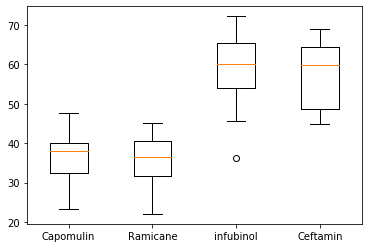

In [10]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#C2, cell 2

plt.boxplot([capomulin,ramicane,infubinol,ceftamin],labels=["Capomulin", "Ramicane", "infubinol", "Ceftamin"])


## Line and scatter plots

In [11]:
study_mouse_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [12]:
single_mouse = capomulin_treated.loc[(capomulin_treated["Mouse ID"]=="b128")]
single_mouse

NameError: name 'capomulin_treated' is not defined

In [ ]:
plt.plot(single_mouse.Timepoint,single_mouse["Tumor Volume (mm3)"])
plt.xlabel("Time")
plt.ylabel("Tumor Size")

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# A11 AND B6




#study_results.plot(kind="scatter", x="Mouse Weight", y="Avg Tumor Volume", grid=True, figsize=(8,8),
             # title="Tumor Size")



In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
